[link for Housing Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [4]:
#  upload file
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing (1).csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("Housing.csv")

# Display the first few rows
print(data.head())

# Data Preprocessing
# Convert categorical columns to numerical
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']

numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

# Separating features and target
X = data[categorical_columns + numerical_columns]
y = data[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OneHotEncoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Building pipelines for models
models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
}

# Training and evaluating models
results = {}
for model_name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {"MSE": mse, "R2": r2}

# Display results
print("Model Evaluation:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Model Evaluation:
Linear Regression: MSE = 1754318687330.67, R2 = 0.65
Random Forest: MSE = 1959323

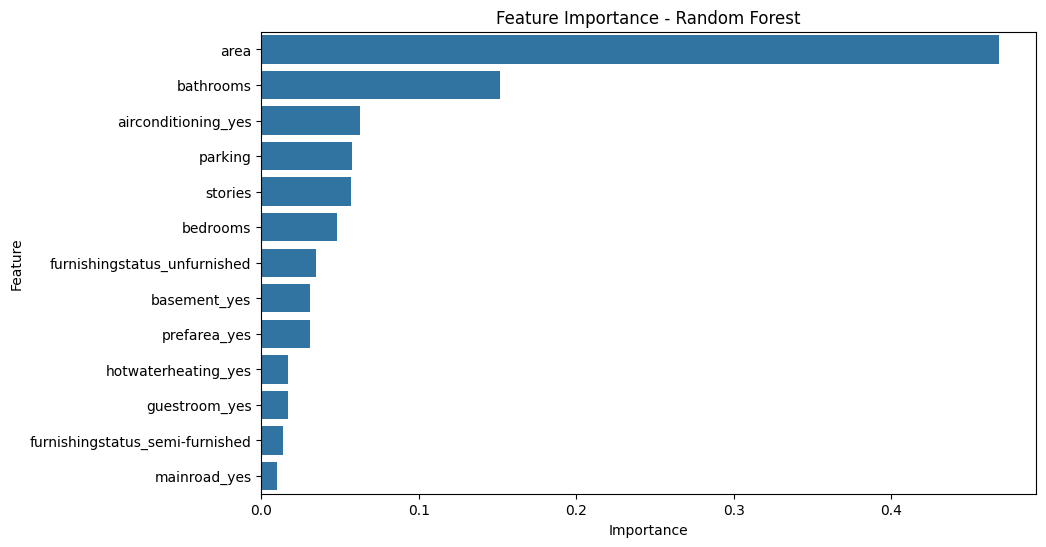

In [6]:
# Feature importance for Random Forest
best_model = models["Random Forest"]
rf_model = best_model.named_steps['model']

# Extracting feature importance
encoded_feature_names = numerical_columns + list(
    best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)
)
feature_importances = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance - Random Forest')
plt.show()

In [8]:
def predict_house_price(model_pipeline):
    """
    we define a function to predict house price based on user inputs.
    """
    print("\nEnter the house details for prediction:")
    try:
        # User inputs
        area = float(input("Enter area in square feet: "))
        bedrooms = int(input("Enter number of bedrooms: "))
        bathrooms = int(input("Enter number of bathrooms: "))
        stories = int(input("Enter number of stories: "))
        mainroad = input("Is the house on a main road? (yes/no): ").strip().lower()
        guestroom = input("Does the house have a guest room? (yes/no): ").strip().lower()
        basement = input("Does the house have a basement? (yes/no): ").strip().lower()
        hotwaterheating = input("Does the house have hot water heating? (yes/no): ").strip().lower()
        airconditioning = input("Does the house have air conditioning? (yes/no): ").strip().lower()
        parking = int(input("Enter the number of parking spaces: "))
        prefarea = input("Is the house in a preferred area? (yes/no): ").strip().lower()
        furnishingstatus = input("Enter furnishing status (furnished/semi-furnished/unfurnished): ").strip().lower()

        # Creating a dataframe for user input
        user_data = pd.DataFrame({
            'area': [area],
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'stories': [stories],
            'mainroad': [mainroad],
            'guestroom': [guestroom],
            'basement': [basement],
            'hotwaterheating': [hotwaterheating],
            'airconditioning': [airconditioning],
            'parking': [parking],
            'prefarea': [prefarea],
            'furnishingstatus': [furnishingstatus]
        })

        # Predicting house price
        predicted_price = model_pipeline.predict(user_data)[0]
        print(f"\nThe predicted house price is: ${predicted_price:,.2f}")
    except Exception as e:
        print(f"Error in input or prediction: {e}")

# Train the best model (Random Forest in this case)
final_model = models["Random Forest"]
final_model.fit(X_train, y_train)

# Allow user input for prediction
predict_house_price(final_model)



Enter the house details for prediction:
Enter area in square feet: 1600
Enter number of bedrooms: 4
Enter number of bathrooms: 2
Enter number of stories: 1
Is the house on a main road? (yes/no): yes
Does the house have a guest room? (yes/no): yes
Does the house have a basement? (yes/no): no
Does the house have hot water heating? (yes/no): no
Does the house have air conditioning? (yes/no): yes
Enter the number of parking spaces: 3
Is the house in a preferred area? (yes/no): yes
Enter furnishing status (furnished/semi-furnished/unfurnished): furnished

The predicted house price is: $5,101,544.00
